In [186]:
import pandas as pd

# create pandas.dataframe
df = pd.read_csv("~/Downloads/iris/iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [187]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [188]:
import numpy as np

y = df.iloc[0:100, 4]
# df.iloc[0:100, 4] selects the first 100 rows (from index 0 to 99) of the DataFrame 
# and the 5th column (index 4)
# This column likely contains labels for different classes

y = np.where(y=="Iris-setosa", -1, 1)
# assigns -1 to instances of "Iris-setosa" and 1 to all other instances

X = df.iloc[0:100, [0, 2]].values
# select the first 100 rows, and 0, 2 columns

#### Standardize before Training
Gradient descent is more suitable for standard distribution.

In [189]:
X_std = X.copy()
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()
X = X_std

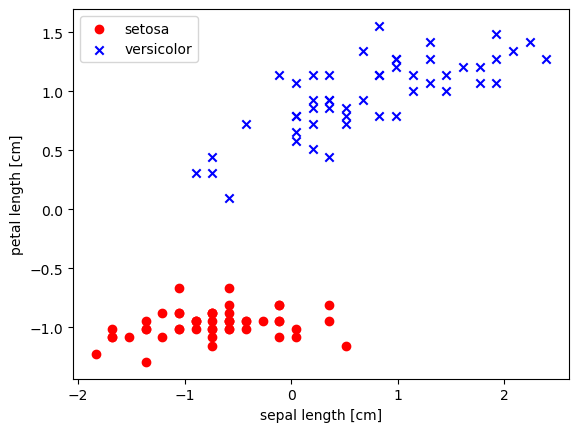

In [190]:
import matplotlib.pyplot as plt
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
# labelled by species

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#### Define the Perceptron Class

In [191]:
class Perceptron(object): # inheritance
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta                      # learning rate
        self.n_iter = n_iter                # iteration time
        self.random_state = random_state    # seed
    def fit(self, X, y):    # X: training vectors - [n_samples, n_features]
        # y: target values - [n_samples]
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0, scale=0.01, size=1+X.shape[1]) # 1d array after fitting
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):   
                # xi: the ith sample
                # target: the ith target value
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi  # num of weight = num of features
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
    def net_input(self, X): # generate Y
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):   # get f(Y)
        return np.where(self.net_input(X) >= 0, 1, -1)

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

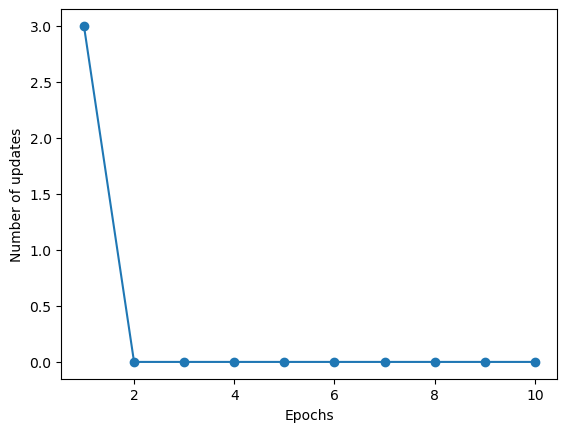

In [192]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')    # epoch: iteration
plt.ylabel('Number of updates')
plt.show()


In [193]:
print(ppn.w_)

[0.21624345 0.00296649 0.37465212]


#### Define Adaline Class

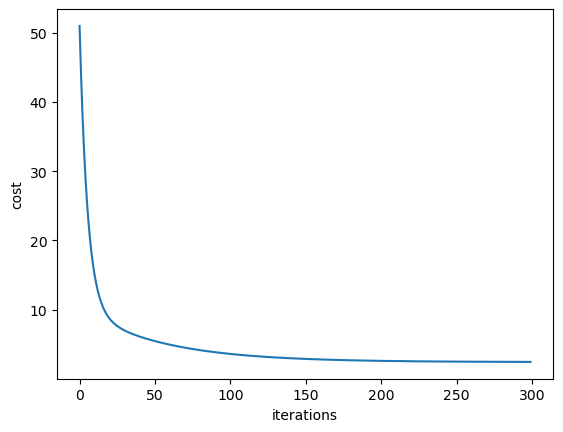

In [194]:
class Adaline(object): # inheritance
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta                      # learning rate
        self.n_iter = n_iter                # iteration time
        self.random_state = random_state    # seed
    def fit(self, X, y):    # X: training vectors - [n_samples, n_features]
        # y: target values - [n_samples]
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0, scale=0.01, size=1+X.shape[1]) # 1d array after fitting
        self.errors_ = []
        self.cost_ = []
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activate(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = 0.5 * (errors ** 2).sum()
            self.cost_.append(cost)
        return self
    def net_input(self, X): # generate Y
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activate(self, X):
        return X
    def predict(self, X):   # get f(Y)
        return np.where(self.net_input(X) >= 0, 1, -1)
    def get_cost(self):
        return self.cost_

ada = Adaline(n_iter=300, eta=0.0005).fit(X,y)

cost = ada.get_cost()
iter = list(range(len(cost)))
plt.plot(iter, cost)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

#### Utilise two models

/var/folders/84/kh2lnvxd5cx0_6s9tdvbhyd00000gn/T/ipykernel_2725/1120254261.py:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl,1], alpha=0.8,


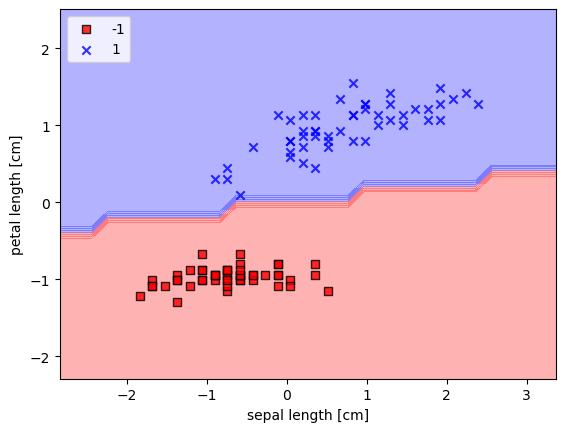

In [195]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.2):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1 # extreme values of the first feature
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # xx1 contains x-coordinate, xx2 contains y-coordinate
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl,1], alpha=0.8,
                    c=colors[idx], marker=markers[idx],
                    label=cl, edgecolors='black')
        
# Modify: ppn / ada
plot_decision_regions(X, y, ada)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()